In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"  # TensorFlow 로그 숨김

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

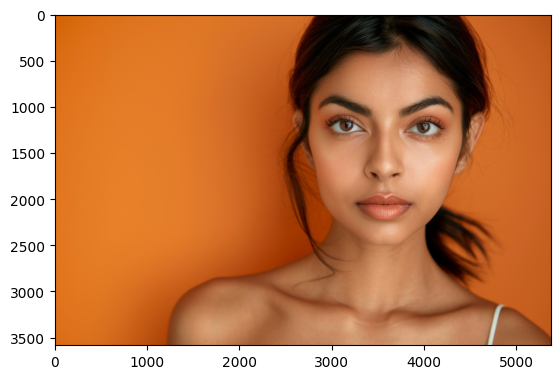

In [2]:
IMG_PATH="test_face.jpg"

img=cv2.imread(IMG_PATH)
h, w, _=img.shape
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
MP_FACE_MESH=mp.solutions.face_mesh
FACE_MESH=MP_FACE_MESH.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True  # 홍채 포함
)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1749891628.719851   31629 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749891628.734733   31630 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [4]:
# landmark 추출
results=FACE_MESH.process(img_rgb)

W0000 00:00:1749891629.723448   31636 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [5]:
img_with_landmark=img.copy()

for face_landmarks in results.multi_face_landmarks:
    for idx, lm in enumerate(face_landmarks.landmark):
        x=int(lm.x * w)
        y=int(lm.y * h)
        cv2.circle(img_with_landmark, (x, y), 1, (0, 255, 0), -1)
        cv2.putText(img_with_landmark, str(idx), (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

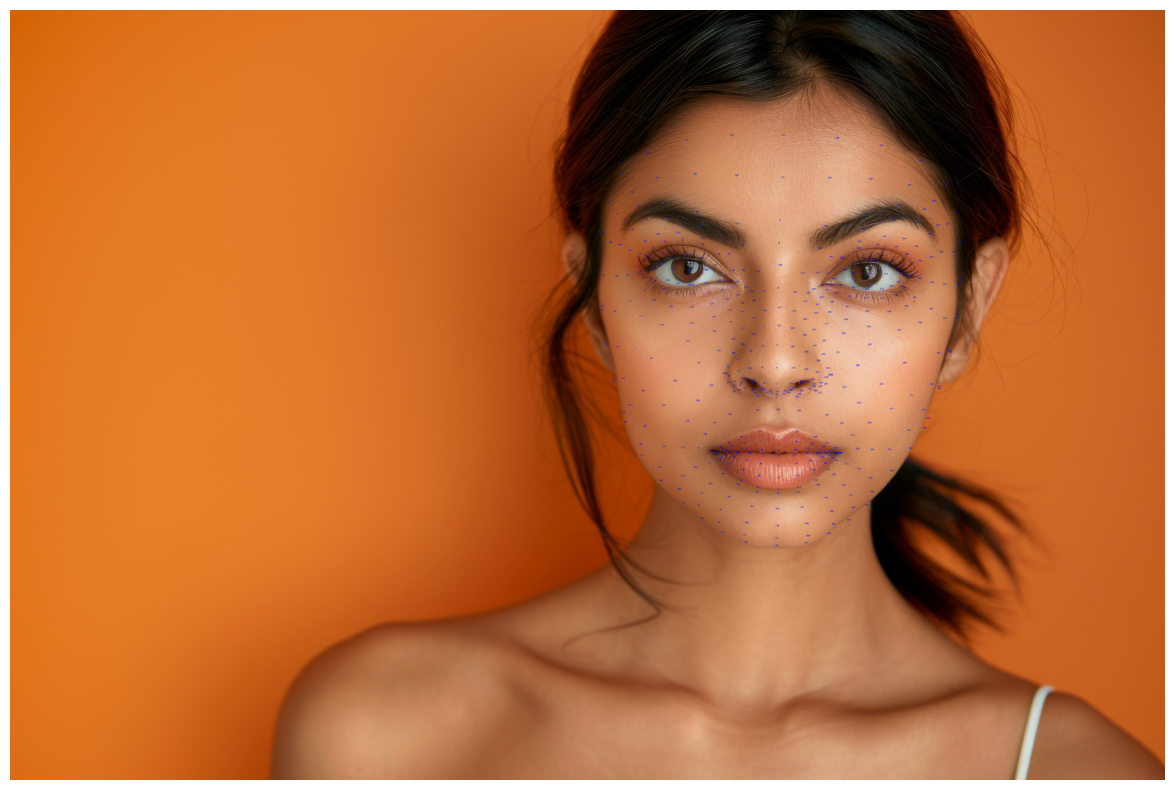

In [11]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_with_landmark, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.savefig("face_mesh_landmarks.png", dpi=600, bbox_inches="tight")
plt.show()

# FaceMesh 눈 중심 Landmarks 인덱스
- 오른쪽 눈 (사용자 기준 왼쪽 눈): 469, 470, 471, 472 (478 (오른쪽 홍채 중심))
- 왼쪽 눈 (사용자 기준 오른쪽 눈): 474, 475, 476, 477 (473 (왼쪽 홍채 중심))

즉 `refine_landmarks=True` 옵션을 사용하여야 이와 같이 홍채 인덱스를 구할 수 있으며,  
위 4개의 점들은 각각 홍채의 사각형 영역을 형성하며, 눈 중심을 기준으로 안정적인 eye patch cropping이 가능함.  